In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Project Introduction
For our project, we decided to build a content-based recommender system. 

We use the dataset "IMDB Movies Dataset" from kaggle which includes records of the top 1000 IMDB movies and tv shows (last updated 4 years ago).

## Feature description
- `Poster_Link`: Link of the poster that IMDB is using

- `Series_Title`: Name of the movie

- `Released_Year`: Year at which the movie was released

- `Certificate`: Certificate earned by the movie

- `Runtime`: Total runtime of the movie

- `Genre`: Genre of the movie

- `IMDB_Rating`: Rating of the movie by users on IMDB website

- `Overview`: Summary of the plot of the movie

- `Meta_score`: Average score calcualated from professional critic reviews

- `Director`: Name of the movie director

- `Star1, Star2, Star3, Star4` - Names of the main stars

- `No_of_votes`: Total number of user votes on the IMDB website

- `Gross`: Money earned by the movie

# 1. Load dataset
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [36]:
movies_df = pd.read_csv('datasets/imdb_top_1000.csv', low_memory=False)

movies_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Number of votes
We checked for movies in the dataset that may have too less votes and may not be representative. However, the movies included in the data set all have at least 25,000 votes and it is therefore not necessary to exclude any of them.

In [37]:
# show the top 10 movies with the least number of votes
movies_df.No_of_Votes.sort_values(ascending=True).head(10)

264    25088
721    25198
694    25229
718    25312
570    25344
785    25938
989    26337
169    26402
814    26429
863    26457
Name: No_of_Votes, dtype: int64

# 2. Preprocessing

## Missing values
In this section we handle missing values. We start by displaying the columns that contain missing values


In [38]:
movies_df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### `Certificate` column
Below we show the values for the `Certificate` column in our dataset.

Certificate
U           234
A           197
UA          175
R           146
NaN         101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64


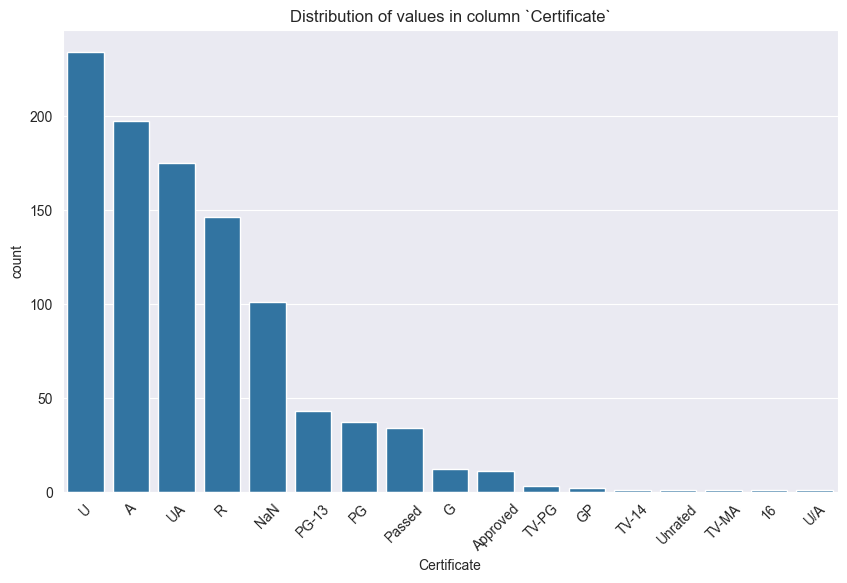

In [39]:
print(movies_df.Certificate.value_counts(dropna=False))

# Fill NaN values with a placeholder and count the values
data_to_plot = movies_df.Certificate.fillna("NaN").to_frame()

# Count the values and sort by count
sorted_counts = data_to_plot['Certificate'].value_counts().sort_values(ascending=False)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot with sorted values
sns.countplot(x='Certificate', data=data_to_plot, order=sorted_counts.index)
plt.title('Distribution of values in column `Certificate`')
plt.xticks(rotation=45)
plt.show()

There are 101 missing values for `Certificate` in this dataset. We are not quite sure, but many movies without a certificate are from countries other than the US. It is possible that these countries do not have the same or any certificates at all and therefore 'none' has been assigned.

**Strategy for missing values**: Assign category "None"

### `Meta_score` column
Below we show the values for the `Meta_score` column in our dataset.

Meta_score
NaN     157
76.0     32
84.0     29
90.0     29
73.0     27
       ... 
28.0      1
36.0      1
46.0      1
30.0      1
41.0      1
Name: count, Length: 64, dtype: int64


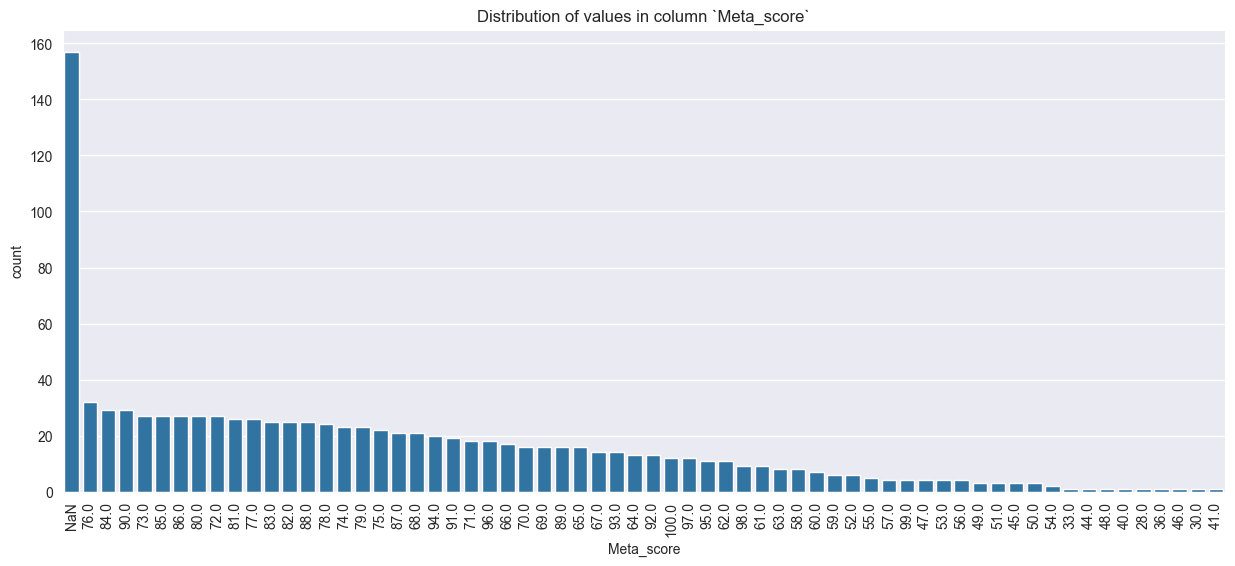

In [40]:
print(movies_df.Meta_score.value_counts(dropna=False))

# Fill NaN values with a placeholder and count the values
data_to_plot = movies_df.Meta_score.fillna("NaN").to_frame()

# Count the values and sort by count
sorted_counts = data_to_plot['Meta_score'].value_counts().sort_values(ascending=False)

# Set up the plot
plt.figure(figsize=(15, 6))

# Plot with sorted values
sns.countplot(x='Meta_score', data=data_to_plot, order=sorted_counts.index)
plt.title('Distribution of values in column `Meta_score`')
plt.xticks(rotation=90)
plt.show()

Calculatig the mean value for the meta score would not be very accurate in our opinion. Moreover, this column is not relevant to our context which is why we have decided to assign the value 0 (zero).

**Strategy for missing values**: Assign value 0 (zero)

### `Gross` column
Below we show the values for the `Gross` column in our dataset. We do not plot them as there are over 800 distinct values.

In [41]:
print(movies_df.Gross.value_counts(dropna=False))

Gross
NaN            169
4,360,000        5
25,000,000       2
5,321,508        2
5,450,000        2
              ... 
696,690          1
1,378,435        1
141,843,612      1
13,780,024       1
330,252,182      1
Name: count, Length: 824, dtype: int64


As there are so many different values spread over a wide range, it is challenging to impute it accurately. Moreover, this column is not relevant to our context which is why we have decided to assign the value 0 (zero).

**Strategy for missing values**: Assign value 0 (zero)

## Apply missing values strategy

In [42]:
fill_missing_columns_none = ['Certificate']
fill_missing_columns_zero = ['Gross', 'Meta_score']

# Fill missing values with 'None'
movies_df[fill_missing_columns_none] = movies_df[fill_missing_columns_none].fillna('None')
movies_df[fill_missing_columns_zero] = movies_df[fill_missing_columns_zero].fillna(0)

In [43]:
# Check the number of missing values

movies_df.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

## Remove the hyphen in the `Genre` column (sci-fi to scifi)



In [44]:
movies_df['Genre'] = movies_df['Genre'].str.replace('Sci-Fi', 'SciFi')

## Convert `Runtime` and `Gross` to numerical data types

We are showing the data types of the `Runtime` and `Gross` columns below. Currently, those are objects. To be able to work better with these values, we convert them into numerical data types.

In [45]:
# Show data and data types of runtime column
print(movies_df.Runtime)
print(movies_df.Runtime.dtype)

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object
object


In [46]:
# Show data and data types of gross column
print(movies_df.Gross)
print(movies_df.Gross.dtype)

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995              0
996              0
997     30,500,000
998              0
999              0
Name: Gross, Length: 1000, dtype: object
object


In [47]:
# Remove "min" and convert to integer
movies_df['Runtime'] = movies_df['Runtime'].str.replace(' min', '').astype(float)

In [48]:
# Remove commas and convert to float
movies_df['Gross'] = movies_df['Gross'].str.replace(',', '').astype(float)

In [49]:
print(movies_df.Runtime.dtype)
print(movies_df.Gross.dtype)

float64
float64


# 3. Save as CSV files

We save our dataset as CSV file so it can be used in the following notebooks.

In [50]:
movies_df.to_csv('datasets/imdb_top_1000_cleaned.csv', index=False)